In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from cns.data_utils import main_load

# auto reload modules
%load_ext autoreload
%autoreload 2

In [2]:
samples_df, cns_df = main_load("imp")

In [3]:
def clip_data(data, threshold):
    clipped = np.clip(data, 0, threshold)
    rest = data[data > threshold]
    return clipped, rest

Text(0.5, 0.98, 'Clipped copy number distribution')

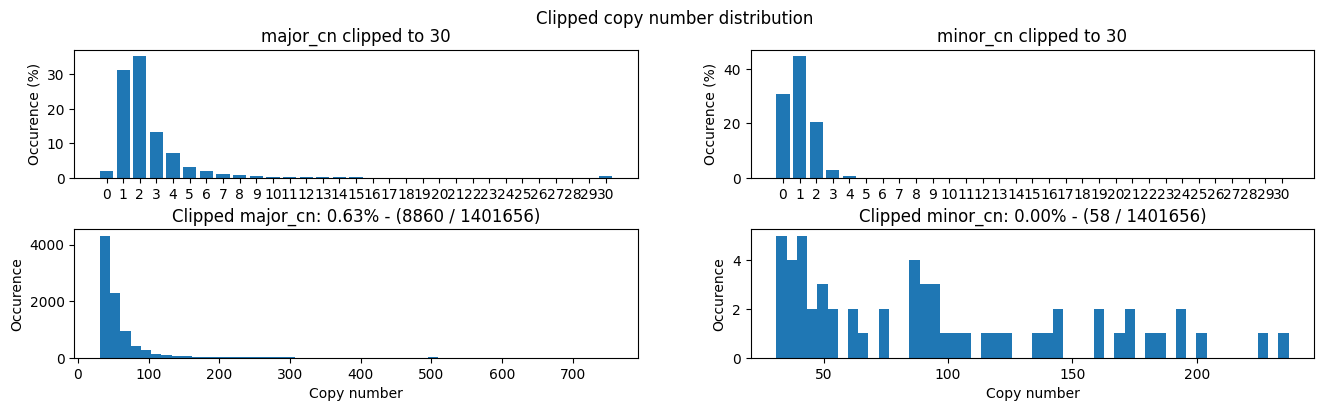

In [4]:
thrs = 30
# create three subplots
fig, axs = plt.subplots(2, 2, figsize=(16, 4))
plt.subplots_adjust(hspace=0.4)

types = ["major_cn", "minor_cn"]
for cn_type in types:
    cn_data, rest = clip_data(cns_df[cn_type], thrs)
    values = cn_data.to_numpy().flatten().astype(int)
    cn_range, counts = np.unique(values, return_counts=True)
    occurences = counts / counts.sum() * 100
    ax = axs[0][types.index(cn_type)]
    ax.bar(cn_range, occurences);
    ax.set_ylabel("Occurence (%)")
    ax.set_xticks(cn_range)
    ax.set_title(f"{cn_type} clipped to {thrs}")
    ax = axs[1][types.index(cn_type)]
    ax.hist(rest, bins=50);    
    ax.set_title(f"Clipped {cn_type}: {len(rest) / cn_data.size:.2%} - ({len(rest)} / {cn_data.size})")
    ax.set_xlabel("Copy number")
    ax.set_ylabel("Occurence")
plt.suptitle(f"Clipped copy number distribution")

Text(0.5, 0.98, 'Copy number distribution over 30')

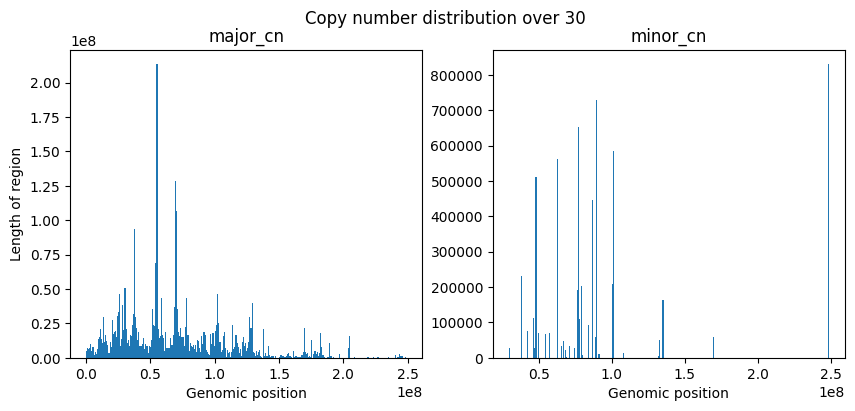

In [5]:
fig, axs = plt.subplots(1, 2,  figsize=(10, 4))
# Plot for major_cn
above = cns_df.query(f"major_cn > {thrs}").copy().reset_index(drop=True)
above["len"] = above["end"] - above["start"]
above["mid"] = above["start"] + above["len"] / 2
axs[0].hist(above["mid"], bins=300, weights=above["len"])
axs[0].set_title('major_cn')
axs[0].set_ylabel('Length of region')
axs[0].set_xlabel('Genomic position')

# Plot for minor_cn
below = cns_df.query(f"minor_cn > {thrs}").copy().reset_index(drop=True)
below["len"] = below["end"] - below["start"]
below["mid"] = below["start"] + below["len"] / 2
axs[1].hist(below["mid"], bins=300, weights=below["len"])
axs[1].set_title('minor_cn')
axs[1].set_xlabel('Genomic position')

plt.suptitle(f"Copy number distribution over {thrs}")